In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
# Define a function to calculate the aspect ratio of an image
def calculate_aspect_ratio(image_path):
    img = cv2.imread(image_path)
    height, width, _ = img.shape
    return width / height
# Define the directory where your image dataset is located
dataset_directory = r"C:\Samsung Prism\myvenv\datasets1\images\train"
# Initialize an empty list to store the aspect ratios
aspect_ratios = []
# Loop through the images in your dataset directory
for filename in os.listdir(dataset_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(dataset_directory, filename)
        aspect_ratio = calculate_aspect_ratio(image_path)
        aspect_ratios.append(aspect_ratio)
# Create a histogram of the aspect ratios
plt.figure(figsize=(8, 6))
plt.hist(aspect_ratios, bins=30, edgecolor='k')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Image Aspect Ratios')
plt.grid(True)
plt.show()

In [ ]:
import os
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np

# Define a function to calculate the aspect ratio of an image
def calculate_aspect_ratio(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        height, width, _ = img.shape
        return width / height
    else:
        # Handle the case where the image could not be loaded
        print(f"Error: Could not load image from {image_path}")
        return None

# Define the directory where your JSON files are located
json_directory = r"C:\Samsung Prism\myvenv\final_annotations\train"

# Initialize a dictionary to store aspect ratios for each class
class_aspect_ratios = {}

# Loop through the JSON files in the directory
for filename in os.listdir(json_directory):
    if filename.endswith(".json"):
        json_path = os.path.join(json_directory, filename)
       
        # Load the JSON data for this image
        with open(json_path, 'r') as f:
            data = json.load(f)
       
         # Check if the 'outputs' key exists and has 'object' key within it
        if 'outputs' in data and 'object' in data['outputs']:
            # Extract class labels from the "outputs" section
            labels = [item['name'].strip() for item in data['outputs']['object']]
       
        # Calculate the aspect ratio for this image
        image_path = data['path']
        aspect_ratio = calculate_aspect_ratio(image_path)
       
        # Check if aspect_ratio is not None (i.e., image was successfully loaded)
        if aspect_ratio is not None:
            # Loop through the labels and add aspect ratios to the corresponding class
            for label in labels:
                if label not in class_aspect_ratios:
                    class_aspect_ratios[label] = []
                class_aspect_ratios[label].append(aspect_ratio)

# Create a histogram of aspect ratios for each class
plt.figure(figsize=(12, 8))
for label, aspect_ratios in class_aspect_ratios.items():
    plt.hist(aspect_ratios, bins=30, alpha=0.5, label=f'Class {label}')
   
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Aspect Ratios for Each Class')
plt.legend()
plt.grid(True)

plt.show()


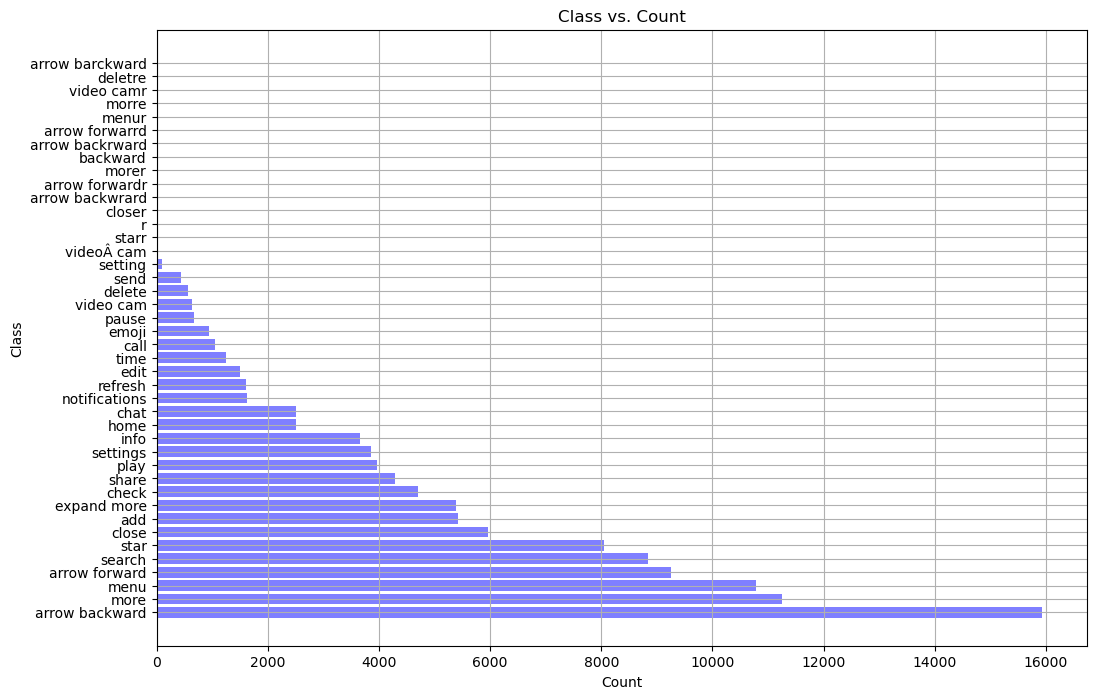

In [3]:
import os
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Define a function to calculate the aspect ratio of an image
def calculate_aspect_ratio(image_path):
    img = cv2.imread(image_path)
    height, width, _ = img.shape
    return width / height

# Define the directory where your JSON files are located
json_directory = r"F:\Icon Detection\myvenv\final_annotations\train"

# Initialize a dictionary to store aspect ratios for each class
class_counts = defaultdict(int)

# Loop through the JSON files in the directory
for filename in os.listdir(json_directory):
    if filename.endswith(".json"):
        json_path = os.path.join(json_directory, filename)
       
        # Load the JSON data for this image
        with open(json_path, 'r') as f:
            data = json.load(f)
       
        # Check if the 'outputs' key exists and has 'object' key within it
        if 'outputs' in data and 'object' in data['outputs']:
            # Extract class labels from the "outputs" section
            labels = [item['name'].strip() for item in data['outputs']['object']]
       
            # Count the occurrences of each class
            for label in labels:
                class_counts[label] += 1

# Sort classes by count in descending order
sorted_classes = sorted(class_counts.keys(), key=lambda x: class_counts[x], reverse=True)
sorted_counts = [class_counts[label] for label in sorted_classes]

# Create a bar chart with class names on the y-axis and class counts on the x-axis
plt.figure(figsize=(12, 8))
plt.barh(np.arange(len(sorted_classes)), sorted_counts, alpha=0.5, color='blue')

# Set y-axis labels to class names and x-axis labels to class counts
plt.yticks(np.arange(len(sorted_classes)), sorted_classes)
plt.xlabel('Count')
plt.ylabel('Class')
plt.title('Class vs. Count')

plt.grid(True)
plt.show()


In [ ]:
import json
import os
for i in range(61261,66714):
    if not os.path.exists('C:/Samsung Prism/myvenv/final_annotations/train/' + str(i) + '.json'): # If the file does not exist
        continue
    # Load the JSON data from the file
    with open('C:/Samsung Prism/myvenv/final_annotations/train/' + str(i) + '.json', 'r') as json_file:
        data = json.load(json_file)
        
    
    # Modify the 'path' key

    a=".jpg"
    b=str(i)
    new_path = "C:/Samsung Prism/myvenv/datasets/images/train/" + b + a
    data['path'] = new_path
    
    # Save the modified JSON data back to the file
    with open('C:/Samsung Prism/myvenv/final_annotations/train/' + str(i) + '.json', 'w') as json_file:
        json.dump(data, json_file, indent=4)


In [5]:
import json
import os
icons = ['notifications','chat','home','info','settings','play','close','star','more','menu']

c=0

for i in range(0,72219):
    if not os.path.exists('F:/Icon Detection/final_annotations/final_annotations/' + str(i) + '.json'):
        continue

    with open('F:/Icon Detection/final_annotations/final_annotations/' + str(i) + '.json', 'r') as json_file:
        data = json.load(json_file)

    if data['labeled']==False:
        continue
    
    l=data['outputs']['object']
    
    for j in l:
        if j["name"] in icons:
            c=0
            #print(j['name'])
            break
        else:
            c+=1

    if c==len(l):
        c=0
        #print('No')
        continue

    new_path = "F:/Icon Detection/myvenv/GANs/images1/" + str(i) + '.jpg'
    data['path'] = new_path

    # # Ensure the directory 'C:/Samsung Prism/myvenv/GANs/labels/' exists
    os.makedirs('F:/Icon Detection/myvenv/GANs/labels1', exist_ok=True)

    with open('F:/Icon Detection/myvenv/GANs/labels1/' + str(i) + '.json', 'w') as json_file:
        json.dump(data, json_file, indent=4)


KeyboardInterrupt: 

In [8]:
import os
import json
with open('F:/Icon Detection/final_annotations/final_annotations.json', 'r') as json_file:
        data = json.load(json_file)

In [48]:
l=[]
icons = ['settings', 'send', 'delete', 'video cam', 'pause', 'emoji', 'call', 'time', 'edit', 'refresh', 'notifications']
for j in l:
        if j["name"] in icons:
            print('a')
        else:
            print('b')

In [6]:
import glob
import shutil
import os


src_dir = "F:/Icon Detection/myvenv/datasets/images/train"
dst_dir = "F:/Icon Detection/myvenv/GANs/images1"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    #print(jpgfile)
    a=jpgfile[46:jpgfile.index('.')]
    if not os.path.exists("F:/Icon Detection/myvenv/GANs/labels1/" + a + ".json"):
        continue
    shutil.copy(jpgfile, dst_dir)


In [ ]:
a="C:/Samsung Prism/myvenv/test5\66714.jpg"
print(a.index('.'))
print(len(a))
print(a[32])

In [ ]:
import json
import os
icons = ['settings', 'send', 'delete', 'video cam', 'pause', 'emoji', 'call', 'time', 'edit', 'refresh', 'notifications','chat','home','info','settings','play']

c=0

for i in range(0,66714):
    if not os.path.exists('F:/Icon Detection/myvenv/final_annotations/train/' + str(i) + '.json'):
        continue

    with open('F:/Icon Detection/myvenv/final_annotations/train/' + str(i) + '.json', 'r') as json_file:
        data = json.load(json_file)

    if data['labeled']==False:
        continue
    
    l=data['outputs']['object']
    
    for j in l:
        if j["name"] in icons:
            c=0
            #print(j['name'])
            break
        else:
            c+=1

    if c==len(l):
        c=0
        #print('No')
        continue

    
